# SYSM 6302 - Lab 2
Jonas Wagner, jrw200000




In [29]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

### Section 6.9: Degree

**Good Example:** An example of networks where a node having a high degree is a good thing may be a social network in which edges represent freindships. In such a network, having a high degree indicates you have many friends.


**Bad Example:** An example of networks where a node having a high degree is a bad thing may be a highway system in which nodes are interchanges of highways. In such a network, having a high degree indicates a lot of highways being connected through that interchange (in other words, a lot of traffic).


**Low-Degree Importance Example:** An example of a low degree node that may be important would be a single node that solely connects two highly connected (technically not) components. This node may have a low degree, but is vital for allowing paths between two subsets of a graph.

**Equation Explination:**
Equation (6.25) in Newman is the pair of summations for in and out degrees of a directed network.

The in-degree equation is given as: $$k_i^{in} = \sum_{j=1}^{n} A_{ij}$$
The out-degree equation is given as: $$k_i^{out} = \sum_{i=1}^{n} A_{ij}$$

All these equation are describing is the sum of either the collum or row of the adjacency matrices, which can be equivently thought of as the sum of incomming or outgoing edges respectivly.

### Section 6.10-6.11: Paths & Components



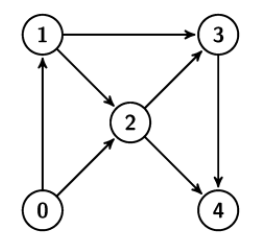

In [3]:
Image(filename = 'fig/ExamplePathNetwork.png')

The network shown in the previous figure can be described by the folloing adjacency matrix.

In [4]:
A = np.array([  [0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0],
                [1, 1, 0, 0, 0],
                [0, 1, 1, 0, 0],
                [0, 0, 1, 1, 0]])
print('A = ')
print(A)

A = 
[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]]


#### $A^2$ Calculations

In [5]:
print('A^2 = A A =\n')
print(A)
print('\n*\n')
print(A)
print('\n=\n')
print(A.dot(A))

A^2 = A A =

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]]

*

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]]

=

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [2 1 0 0 0]
 [1 2 1 0 0]]


Each nonzero element in $A^2$ represents the number of paths of length 2 from node j to i.

$A_{0,2}$ = 0 -> 1 -> 2

$A_{0,3}$ = 0 -> 1 -> 3 and 0 -> 2 -> 3

$A_{0,4}$ = 0 -> 2 -> 4

$A_{1,3}$ = 1 -> 2 -> 3

$A_{1,4}$ = 1 -> 2 -> 4 and 1 -> 3 -> 4

$A_{2,4}$ = 2 -> 3 -> 4


#### x Vector Propogation Calculations

In [6]:
x = np.array([[1,0,0,0,0]]).T
print(x)


[[1]
 [0]
 [0]
 [0]
 [0]]


In [7]:
print('Ax=\n')
print(A.dot(x))

Ax=

[[0]
 [1]
 [1]
 [0]
 [0]]


In [8]:
print('A^2x=\n')
print(A.dot(A.dot(x)))

A^2x=

[[0]
 [0]
 [1]
 [2]
 [1]]


In [9]:
print('A^3x=\n')
print(A.dot(A.dot(A.dot(x))))

A^3x=

[[0]
 [0]
 [0]
 [1]
 [3]]


Each resulting vector for $A^r x$ represents the potential end points for all paths of length r propogating from the initial state $x$.

In [10]:
x = np.array([[0,0,1,0,0]]).T
print(x)


[[0]
 [0]
 [1]
 [0]
 [0]]


In [11]:
print('Ax=\n')
print(A.dot(x))

Ax=

[[0]
 [0]
 [0]
 [1]
 [1]]


In [12]:
print('A^2x=\n')
print(A.dot(A.dot(x)))

A^2x=

[[0]
 [0]
 [0]
 [0]
 [1]]


In [13]:
print('A^3x=\n')
print(A.dot(A.dot(A.dot(x))))

A^3x=

[[0]
 [0]
 [0]
 [0]
 [0]]


This observation can be generalized, as each one of these solutions are also indicative of the final locations for paths originating at node 2.

### Snub Code

The previous figure can be described by the following adjacency matrix:

In [14]:
import networkx as nx
import sys
sys.path.append('../d3networkx/')
import d3networkx as d3nx
from d3graph import D3Graph, D3DiGraph
from numpy import *
from time import time
import asyncio

def square_grid(n,d3,G,x0=100,y0=100,w=50):
    if G is None:
        G = D3Graph()
    # find the dimensions for the grid that are as close as possible
    num_rows = int(floor(sqrt(n)))
    while n % num_rows != 0:
        num_rows += 1
    num_cols = int(n/num_rows)
    
    # Add all the nodes
    G.add_nodes_from(range(n))
        
    # Add the edges and position the nodes
    for i in range(num_rows):
        for j in range(num_cols):
            n = num_cols*i + j
            d3.position_node(n,x0+i*w,y0+j*w)
            if i < num_rows-1:
                G.add_edge(n,n+num_cols) # add edge down
            if j < num_cols-1:
                G.add_edge(n,n+1) # add edge right

async def propagate(G,d3,x,steps,slp=0.5,keep_highlights=False,update_at_end=False):
    interactive = d3.interactive
    d3.set_interactive(False)
    A = nx.adjacency_matrix(G).todense().T  # adjacency matrix
    d3.highlight_nodes_by_index(list(where(x>0)[0]))
    d3.update()
    await asyncio.sleep(slp)
    cum_highlighted = sign(x)
    for i in range(steps): # the brains
        x = sign(dot(A,x)) # the brains
        cum_highlighted = sign(cum_highlighted+x)
        if not update_at_end:
            if not keep_highlights:
                d3.clear_highlights()
            d3.highlight_nodes_by_index(list(where(x>0)[0]))
            d3.update()
            await asyncio.sleep(slp)
    if update_at_end:
        if not keep_highlights:
            d3.clear_highlights()
            d3.highlight_nodes_by_index(list(where(x>0)[0]))
        else:
            d3.highlight_nodes_by_index(list(where(cum_highlighted>0)[0]))
        d3.update()
    d3.set_interactive(interactive)
    if keep_highlights:
        return cum_highlighted
    else:
        return x 

This next line starts up the visualizer. It will start some background code that sends data to the visualizer and then it will open a new browser window where the visualizer will live. Once you have the visualizer running, you can leave it running for the entire session, so don't re-run this block. If you close the `visualizer.html` (or hit refresh), you will need to reestablish this connection. In this case, you should click the refresh button in the Jupyter notebook (not for the webpage) to restart the kernel (which will clear your variables and Python environment).

In [15]:
d3 = await d3nx.create_d3nx_visualizer()
#d3 = await d3nx.create_d3nx_visualizer(canvas_size=(1200,1000))

websocket server started...networkx connected...visualizer connected...

## Grid Network

In [18]:
d3.clear()
d3.set_interactive(False)
G = D3Graph()
d3.set_graph(G)
square_grid(144,d3,G,x0=75,y0=70)
d3.update()

#### Node Degrees

The 12x12 lattice has many nodes with degrees ranging from 2-4. The 4 corner nodes have a degree of 2, the other exterior nodes have a degree of 3, and the interior nodes have degree of 4.

<BarContainer object of 3 artists>

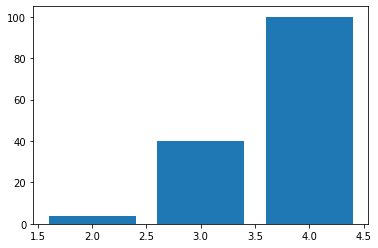

In [33]:
x = [2,3,4]
y = [4,40,100]
plt.bar(x,y)

#### Propogate

In [37]:
x = zeros((G.number_of_nodes(),1))
x[0] = 1
await propagate(G,d3,x,10,slp=1);

The propogation is propogating the state of individual nodes to their neighbors for 10 time steps.

It stops becouse 10 time steps have pased, and the result is the set of nodes that can be reaced by paths of length 10.

The propogation can be furthered by adjusting the number of steps it takes:

In [38]:
steps = 15
await propagate(G,d3,x,steps,slp=1);

## Directed Network

In [77]:
d3.clear()
G = D3DiGraph(nx.read_weighted_edgelist('lab2.edgelist',create_using=nx.DiGraph))
d3.set_graph(G)
d3.update()

In [66]:
G.add_edge('test','3')
# d3.set_graph(G)
# d3.update()

In [67]:
d3.set_interactive(True)

In [68]:
G.remove_node('4')

#### Propogate

In [78]:
x = zeros((G.number_of_nodes(),1))
x[0] = 1
x_end = await propagate(G,d3,x,10,slp=1)
print('x_end =')
print(x_end)

x_end =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


The end result, x_end, is a vector containing the states of the nodes after 10 time steps. This is also the set of nodes that are reachable by paths of length 10. In this case the result is all zeros, wich is related to the acyclic nature of the graph.

In [83]:
A = G.adjacency()

#### 

In [10]:
# code to find the out-component of node 1

## E. coli Protein Network

In [11]:
d3.clear()
G = D3DiGraph(nx.read_weighted_edgelist('ecoli.edgelist',create_using=nx.DiGraph))
d3.set_interactive(False)
d3.set_graph(G)
d3.set_interactive(True)
d3.update()
print('Ecoli has %i nodes.' % G.number_of_nodes())

Ecoli has 418 nodes.


In [12]:
# code to find the out-component of node 2

In [13]:
# code to find the out-component of node 16

In [14]:
#print(nx.diameter(G)) # does not work!

def diameter2(G):
    spaths = dict(nx.all_pairs_shortest_path(G))
    # fill in!
    return diameter, path

# use the new diameter function here

## Section 6.12: Flows & Cut Sets

In [15]:
def worst_graph(n):
    # to do
    return G

def best_graph(n):
    # to do
    return G    

# create graph
start_time = time()
# perform min cut
print('min cut took %1.2f seconds' % (time() - start_time))

min cut took 0.00 seconds


In [16]:
G = nx.read_gml('pert.gml','name')

# find longest path